# ML Task 2.1 Unsupervised learning algorithms - Part 2 PCA

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Principal Component Analysis (PCA)

#### 02.01 Fit PCA: globally on all 147 station-features

#### 02.02 Fit PCA: per station on available features (maximum 11)

#### 03. Final question: cluster interpretation

### 01. Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline

In [3]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets\Unsupervised'

In [13]:
# Import PCs (principal components) scores, unscaled weather, scaled weather and Pleasant weather answers subset datasets
scores_df = pd.read_csv(os.path.join(path, 'weather_data_scaled_pc_147_scores.csv'), index_col=False)
df_scaled = pd.read_csv(os.path.join(path, 'weather_data_scaled_2001-2010.csv'), index_col=False)
pleasant_ans_2001_2010 = pd.read_csv(os.path.join(path, 'pleasant_ans_2001_2010_no_date.csv'), index_col=False)
df2_2001_2010 = pd.read_csv(os.path.join(path, 'pleasant_ans_2001_2010.csv'), index_col=False)
df_2001_2010 = pd.read_csv(os.path.join(path, 'weather_data_unscaled_2001_2010.csv'), index_col=False)

#### Check imported file dimensions and content

In [17]:
scores_df.shape

(3652, 147)

In [19]:
scores_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
0,-10.271595,-3.296856,1.022926,-6.238022,1.505655,0.875294,0.727356,-0.785606,1.312152,-0.066805,...,-0.098366,0.012959,-0.044398,-0.021862,0.131607,-0.033941,0.034455,0.037513,0.005060,0.002575
1,-7.692770,-5.882302,-1.289673,-3.706292,2.717943,2.089408,-0.546597,-0.182383,0.792067,1.064329,...,0.031671,-0.023946,0.030679,0.015667,0.104454,0.074495,0.034356,0.027894,0.004073,0.004283


In [21]:
scores_df.tail(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
3650,-12.238020,4.620437,0.872143,0.906333,2.095376,-3.183547,0.901289,1.894778,0.015657,-0.091032,...,-0.037732,-0.027496,-0.051008,0.052630,-0.029207,-0.122056,-0.039473,0.013198,-0.000941,0.002498
3651,-12.394121,2.085038,2.983681,0.825967,0.883701,-2.790491,1.024923,0.511049,-1.108619,-0.484854,...,0.017918,0.004978,0.033282,0.092257,0.019934,0.000210,0.004760,-0.005044,-0.000175,-0.004342


In [23]:
df_scaled.shape

(3652, 147)

In [25]:
df_scaled.head(2)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.663510,-0.214996,-0.612636,-1.136837,-1.255674,1.817868,-0.173863,-1.061125,-1.326661,-1.193256,...,0.715728,0.951297,-3.776689,-1.189451,0.384473,-0.01655,-1.020485,-0.629896,-0.279187,-0.870120
1,1.097452,-0.214996,0.569221,-1.603673,-1.234239,1.429848,-0.173863,-1.061125,-0.560366,-0.486081,...,-1.022967,-0.197064,-2.583562,-1.070629,-0.198807,-0.01655,-0.565555,-1.174101,-0.710733,-1.353503


In [27]:
df_scaled.tail(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
3649,1.097452,-0.571629,2.023815,0.705269,-1.212803,-0.436343,5.892522,-1.061125,-1.339873,-1.016462,...,-0.443402,0.032608,-0.026862,-1.106276,-0.033032,-0.01655,-0.110626,-0.114334,-0.126877,-0.628428
3650,1.097452,-0.999589,2.296551,0.831441,-1.287828,-0.436343,3.870394,-1.061125,-1.432357,-1.060661,...,-0.443402,0.032608,-0.026862,-1.070629,-0.033032,-0.01655,-0.110626,-0.114334,-0.126877,-0.547865
3651,1.097452,-0.999589,2.296551,0.944996,-1.287828,-0.436343,2.859329,-1.061125,-1.419145,-1.075393,...,-0.443402,0.032608,-0.026862,-0.975571,-0.033032,-0.01655,-0.110626,-0.114334,-0.126877,-1.380357


In [29]:
pleasant_ans_2001_2010.shape

(3652, 15)

In [31]:
pleasant_ans_2001_2010.head(2)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
pleasant_ans_2001_2010.tail(2)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
3650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df2_2001_2010.shape

(3652, 16)

In [37]:
df2_2001_2010.head(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,2001-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2001-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df2_2001_2010.tail(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
3650,2010-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3651,2010-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df_2001_2010.shape

(3652, 148)

In [43]:
df_2001_2010.head(2)

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,2001-01-01,7,2.1,0.68,1.0086,0.16,1.22,0,0.0,0.8,...,7,0.9,0.9702,0.14,1.09,0,0.0,8.9,7.3,10.5
1,2001-01-02,8,2.1,0.81,1.0049,0.18,1.01,0,0.0,6.6,...,4,0.8,0.9842,0.24,0.14,0,1.7,7.0,5.6,8.7


In [45]:
df_2001_2010.tail(2)

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
3650,2010-12-30,8,1.0,1.0,1.0242,0.13,0.0,8,0.0,0.0,...,5,0.82,1.0142,0.24,0.41,0,3.4,10.7,7.9,11.7
3651,2010-12-31,8,1.0,1.0,1.0251,0.13,0.0,6,0.0,0.1,...,5,0.82,1.0142,0.32,0.41,0,3.4,10.7,7.9,8.6


### 02. Principal Component Analysis (PCA)

### 02.01 Fit PCA: globally on all 147 station-features

In [57]:
# df_scaled is already z-scored, so PCA can be used directly.
# If using the raw (unscaled) dataset instead, then adjust top line to: `use_scaler=True`

use_scaler = False

def fit_pca(X: pd.DataFrame, n_components=None, use_scaler=False):
    pipe = make_pipeline(StandardScaler(with_mean=True, with_std=True), PCA(n_components=n_components)) if use_scaler else PCA(n_components=n_components)
    model = pipe.fit(X)
    # pull PCA object from the pipeline or plain PCA
    pca = model.named_steps['pca'] if use_scaler else model
    return model, pca

pca_model, pca = fit_pca(df_scaled, n_components=None, use_scaler=use_scaler)
explained = pca.explained_variance_ratio_
cumexp = np.cumsum(explained)

### Scree + cumulative variance plots

#### Note: we know in advance that we want to select the number of PCs that give us 80%+ cumulative variance explained. This is a good compromise or middle ground between the 70% and 90% threshold boundaries favored by many analysts.

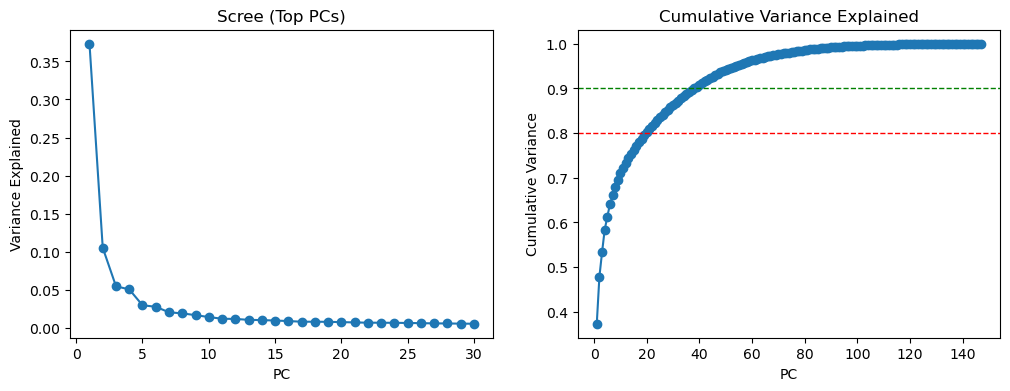

PCs for ≥80% variance: 20


In [60]:
def plot_scree_cumulative(explained, cumexp, top=30):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    k = min(top, len(explained))

    ax[0].plot(np.arange(1, k+1), explained[:k], marker='o')
    ax[0].set_title('Scree (Top PCs)')
    ax[0].set_xlabel('PC')
    ax[0].set_ylabel('Variance Explained')

    ax[1].plot(np.arange(1, len(cumexp)+1), cumexp, marker='o')
    ax[1].axhline(0.80, color='r', ls='--', lw=1)
    ax[1].axhline(0.90, color='g', ls='--', lw=1)
    ax[1].set_title('Cumulative Variance Explained')
    ax[1].set_xlabel('PC')
    ax[1].set_ylabel('Cumulative Variance')
    plt.show()

plot_scree_cumulative(explained, cumexp, top=30)

# pick a K PCs threshold (e.g., 80%)
K80 = int(np.argmax(cumexp >= 0.80) + 1)
print("PCs for ≥80% variance:", K80)

### PC scores (the transformed data) and loadings (station-feature weights)

In [63]:
# Scores: 3652 × n_components (one column per PC)
scores = pca_model.transform(df_scaled)   # np.array
scores_df = pd.DataFrame(scores, index=df_scaled.index,
                         columns=[f'PC{i+1}' for i in range(scores.shape[1])])

# Loadings: 147 × n_components (rows=original station-features)
loadings = pd.DataFrame(pca.components_.T,
                        index=df_scaled.columns,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings['abs_max_pc'] = loadings.abs().idxmax(axis=1)   # quick peek: which PC each feature loads on most

### Tidy loadings with Station & Feature split + top contributors per PC (principal component)

In [66]:
def tidy_loadings(loadings_df: pd.DataFrame) -> pd.DataFrame:
    tidy = loadings_df.drop(columns=['abs_max_pc'], errors='ignore').reset_index().rename(columns={'index':'feature_full'})
    # feature_full like "BASEL_cloud_cover" → station, feature
    tidy[['Station','Feature']] = tidy['feature_full'].str.split('_', n=1, expand=True)
    tidy = tidy.melt(id_vars=['feature_full','Station','Feature'], var_name='PC', value_name='Loading')
    tidy['AbsLoading'] = tidy['Loading'].abs()
    return tidy

tidy = tidy_loadings(loadings)

def top_contributors_for_pc(tidy_df, pc, top=15):
    out = (tidy_df[tidy_df['PC']==pc]
           .sort_values('AbsLoading', ascending=False)
           .head(top)
           .loc[:, ['PC','Station','Feature','Loading','AbsLoading','feature_full']])
    return out

# Example: inspect PC1 & PC2 top drivers
display(top_contributors_for_pc(tidy, 'PC1', top=15))
display(top_contributors_for_pc(tidy, 'PC2', top=15))

,PC,Station,Feature,Loading,AbsLoading,feature_full
68,PC1,KASSEL,temp_max,0.129525,0.129525,KASSEL_temp_max
49,PC1,DUSSELDORF,temp_max,0.129214,0.129214,DUSSELDORF_temp_max
88,PC1,MAASTRICHT,temp_max,0.128615,0.128615,MAASTRICHT_temp_max
10,PC1,BASEL,temp_max,0.128017,0.128017,BASEL_temp_max
38,PC1,DEBILT,temp_max,0.127938,0.127938,DEBILT_temp_max
66,PC1,KASSEL,temp_mean,0.127866,0.127866,KASSEL_temp_mean
8,PC1,BASEL,temp_mean,0.127818,0.127818,BASEL_temp_mean
47,PC1,DUSSELDORF,temp_mean,0.126934,0.126934,DUSSELDORF_temp_mean
78,PC1,LJUBLJANA,temp_max,0.126889,0.126889,LJUBLJANA_temp_max
105,PC1,MUNCHENB,temp_mean,0.126790,0.126790,MUNCHENB_temp_mean


,PC,Station,Feature,Loading,AbsLoading,feature_full
209,PC2,KASSEL,pressure,0.215029,0.215029,KASSEL_pressure
189,PC2,DUSSELDORF,pressure,0.207773,0.207773,DUSSELDORF_pressure
179,PC2,DEBILT,pressure,0.206586,0.206586,DEBILT_pressure
229,PC2,MAASTRICHT,pressure,0.201344,0.201344,MAASTRICHT_pressure
269,PC2,SONNBLICK,pressure,0.183744,0.183744,SONNBLICK_pressure
199,PC2,HEATHROW,pressure,0.180149,0.180149,HEATHROW_pressure
219,PC2,LJUBLJANA,pressure,0.174522,0.174522,LJUBLJANA_pressure
150,PC2,BASEL,pressure,0.167593,0.167593,BASEL_pressure
226,PC2,MAASTRICHT,cloud_cover,-0.160366,0.160366,MAASTRICHT_cloud_cover
169,PC2,BUDAPEST,pressure,0.159438,0.159438,BUDAPEST_pressure


In [68]:
display(top_contributors_for_pc(tidy, 'PC3', top=15))
display(top_contributors_for_pc(tidy, 'PC4', top=15))
display(top_contributors_for_pc(tidy, 'PC5', top=15))

,PC,Station,Feature,Loading,AbsLoading,feature_full
366,PC3,LJUBLJANA,pressure,0.216840,0.216840,LJUBLJANA_pressure
307,PC3,BELGRADE,pressure,0.216630,0.216630,BELGRADE_pressure
416,PC3,SONNBLICK,pressure,0.197906,0.197906,SONNBLICK_pressure
297,PC3,BASEL,pressure,0.197221,0.197221,BASEL_pressure
316,PC3,BUDAPEST,pressure,0.192202,0.192202,BUDAPEST_pressure
386,PC3,MADRID,pressure,0.188267,0.188267,MADRID_pressure
325,PC3,DEBILT,humidity,0.164252,0.164252,DEBILT_humidity
329,PC3,DEBILT,sunshine,-0.155640,0.155640,DEBILT_sunshine
345,PC3,HEATHROW,humidity,0.138284,0.138284,HEATHROW_humidity
327,PC3,DEBILT,global_radiation,-0.135990,0.135990,DEBILT_global_radiation


,PC,Station,Feature,Loading,AbsLoading,feature_full
541,PC4,MUNCHENB,humidity,0.199140,0.199140,MUNCHENB_humidity
493,PC4,HEATHROW,pressure,0.192296,0.192296,HEATHROW_pressure
560,PC4,SONNBLICK,cloud_cover,0.191415,0.191415,SONNBLICK_cloud_cover
566,PC4,SONNBLICK,sunshine,-0.188344,0.188344,SONNBLICK_sunshine
540,PC4,MUNCHENB,cloud_cover,0.186566,0.186566,MUNCHENB_cloud_cover
580,PC4,VALENTIA,pressure,0.185325,0.185325,VALENTIA_pressure
545,PC4,MUNCHENB,sunshine,-0.179052,0.179052,MUNCHENB_sunshine
481,PC4,DUSSELDORF,wind_speed,-0.169223,0.169223,DUSSELDORF_wind_speed
473,PC4,DEBILT,pressure,0.163134,0.163134,DEBILT_pressure
521,PC4,MAASTRICHT,wind_speed,-0.160021,0.160021,MAASTRICHT_wind_speed


,PC,Station,Feature,Loading,AbsLoading,feature_full
659,PC5,LJUBLJANA,humidity,0.210964,0.210964,LJUBLJANA_humidity
677,PC5,MADRID,cloud_cover,0.200658,0.200658,MADRID_cloud_cover
683,PC5,MADRID,sunshine,-0.198104,0.198104,MADRID_sunshine
679,PC5,MADRID,humidity,0.189832,0.189832,MADRID_humidity
727,PC5,VALENTIA,pressure,-0.188480,0.188480,VALENTIA_pressure
681,PC5,MADRID,global_radiation,-0.174627,0.174627,MADRID_global_radiation
609,PC5,BUDAPEST,humidity,0.154929,0.154929,BUDAPEST_humidity
648,PC5,KASSEL,wind_speed,-0.154213,0.154213,KASSEL_wind_speed
658,PC5,LJUBLJANA,wind_speed,-0.148500,0.148500,LJUBLJANA_wind_speed
663,PC5,LJUBLJANA,sunshine,-0.148466,0.148466,LJUBLJANA_sunshine


### Biplot for PC1 vs PC2 (scores + a few loadings)

### Define a custom function for a PC1 vs PC2 biplot, with arrow lengths showing the "strength" of key feature components of each PC. Arrow direction tells us which way in the score space that feature increases.  Features with similar arrow directions are positively correlated; opposite directions are negatively correlated. Each point in the plot is a day (observation), located at the x, y (PC1, PC2) score.  The x- and y-axis scales have been normalized to a -1 to +1 range to remove distortions.

In [167]:
# pip install adjustText  (once)
from adjustText import adjust_text

def biplot_repel(scores_df, loadings_df, explained_variance, pcs=(1,2), n_arrows=16):
    pcx, pcy = pcs
    Xn, Yn = f"PC{pcx}", f"PC{pcy}"
    sx, sy = np.sqrt(explained_variance[pcx-1]), np.sqrt(explained_variance[pcy-1])
    xs = scores_df[Xn].values / sx
    ys = scores_df[Yn].values / sy

    fig, ax = plt.subplots(figsize=(9,8))
    ax.scatter(xs, ys, s=10, alpha=0.18, edgecolor='none')
    t = np.linspace(0, 2*np.pi, 400); ax.plot(np.cos(t), np.sin(t), lw=1, color='0.8')

    L = loadings_df[[Xn, Yn]].copy()
    L["abs_sum"] = L[Xn].abs() + L[Yn].abs()
    L = L.sort_values("abs_sum", ascending=False).head(n_arrows)

    texts = []
    for feat, row in L.iterrows():
        xw, yw = float(row[Xn]), float(row[Yn])
        ax.arrow(0, 0, xw, yw, color="tab:red", alpha=0.9,
                 head_width=0.03, length_includes_head=True, lw=1.5)
        texts.append(ax.text(xw, yw, feat, fontsize=8, color='tab:red'))

    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color="tab:red", lw=0.8))
    ax.set_xlim(-1.25, 1.25); ax.set_ylim(-1.25, 1.25)
    ax.set_xlabel(Xn); ax.set_ylabel(Yn); ax.set_title(f"{Xn} vs {Yn} — correlation biplot")
    plt.tight_layout()
    return fig, ax

#### Call the custom function

(<Figure size 900x800 with 1 Axes>,
 <Axes: title={'center': 'PC1 vs PC2 — correlation biplot'}, xlabel='PC1', ylabel='PC2'>)

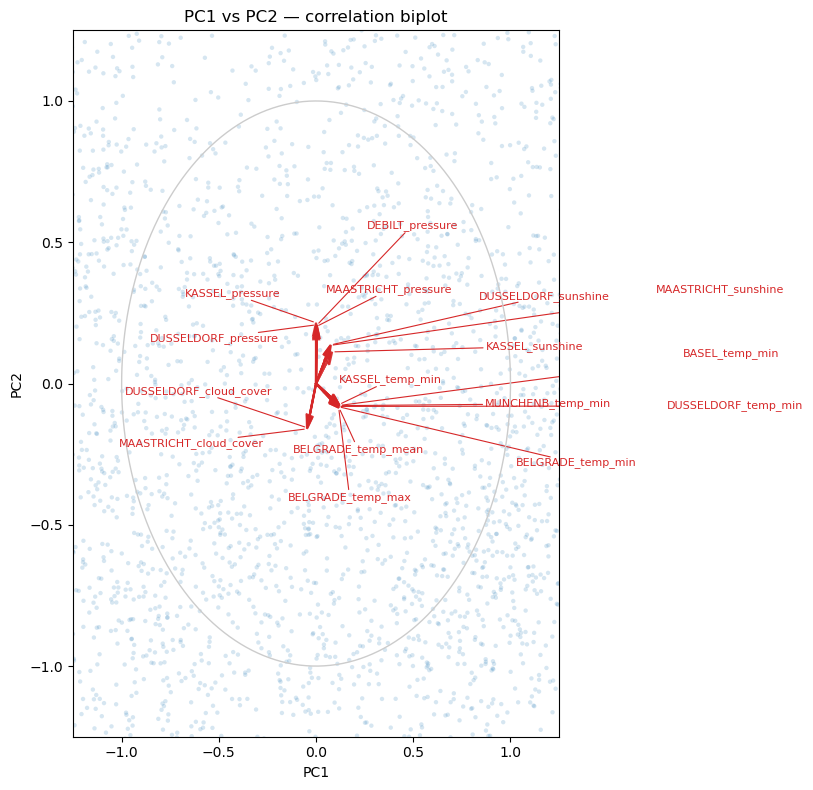

In [169]:
# `scores_df` and `loadings` were already built
# pass the raw eigenvalues from the fitted PCA (sklearn: pca.explained_variance_)

biplot_repel(scores_df, loadings, explained_variance=pca.explained_variance_, pcs=(1,2), n_arrows=16)

#### Note: The correlation biplot ranks features by total absolute contribution across PC1 & PC2 together, whereas the top-contributors tables further above ranks features separately per PC.  Thus, a variable that is moderately strong in both PCs (i.e. minimum temperature) can float to the top of the combined list (and show up with an arrow in the correlation biplot) but be missing from the "top 15" contributors in either PC list.

### Cluster days using top PCs (global) + compare to Pleasant answers

### The following defined custom function uses the first K PCs (e.g. K80) as station-features, clusters row-wise (days) with 'ward' method linkage, chooses "k" by Silhouette score over a small grid, and reports Pleasant weather rates by cluster for each station.

In [75]:
def ward_clusters_from_pcs(scores_df: pd.DataFrame, n_top_pcs: int, k_grid=(2,3,4,5)):
    X = scores_df.iloc[:, :n_top_pcs].values
    Z = linkage(X, method='ward', metric='euclidean')

    best_k, best_sil, best_cut = None, -1, None
    for k in k_grid:
        # find distance cut that yields k clusters
        # distance search: simple percentile scan
        heights = Z[:,2]
        for t in np.linspace(heights.min(), heights.max(), 200):
            labels = fcluster(Z, t=t, criterion='distance')
            if len(np.unique(labels)) == k:
                s = silhouette_score(X, labels, metric='euclidean')
                if s > best_sil:
                    best_sil, best_k, best_cut = s, k, t
                break
    labels = fcluster(Z, t=best_cut, criterion='distance')
    return Z, labels, best_k, best_cut, best_sil

# choose number of PCs (use K80 or set manually)
K = K80
Z_pcs, day_labels, best_k, best_cut, best_sil = ward_clusters_from_pcs(scores_df, n_top_pcs=K, k_grid=(2,3,4,5))
print(f"Best k={best_k}, silhouette={best_sil:.3f}, cut={best_cut:.1f}")

Best k=2, silhouette=0.265, cut=246.0


#### Pleasant rate by cluster, for each station

In [78]:
def pleasant_by_cluster(day_labels, pleasant_df: pd.DataFrame):
    # day_labels: length 3652, ints 1..k
    k = len(np.unique(day_labels))
    out_rows = []
    for col in pleasant_df.columns:
        pleasant = pleasant_df[col].values.astype(int)
        for c in range(1, k+1):
            mask = (day_labels == c)
            n = mask.sum()
            pct = pleasant[mask].mean() if n>0 else np.nan
            out_rows.append({'Station': col.replace('_pleasant_weather',''),
                             'Cluster': c, 'N_obs': n, 'Pleasant_1_pct': pct})
    return pd.DataFrame(out_rows)

pcs_cluster_vs_ans = pleasant_by_cluster(day_labels, pleasant_ans_2001_2010)
display(pcs_cluster_vs_ans.head(30))

,Station,Cluster,N_obs,Pleasant_1_pct
0,BASEL,1,1462,0.511628
1,BASEL,2,2190,0.073059
2,BELGRADE,1,1462,0.623803
3,BELGRADE,2,2190,0.177626
4,BUDAPEST,1,1462,0.670315
5,BUDAPEST,2,2190,0.138356
6,DEBILT,1,1462,0.476060
7,DEBILT,2,2190,0.039726
8,DUSSELDORF,1,1462,0.481532
9,DUSSELDORF,2,2190,0.046119


#### Label PCs (Principal Components) with basic summaries of top contributing weather features

In [81]:
def pc_name_from_loadings(tidy_df, pc, top=5):
    tbl = (tidy_df[tidy_df['PC']==pc]
           .assign(Abs=lambda d: d['Loading'].abs())
           .sort_values('Abs', ascending=False)
           .head(top))
    # e.g., aggregate by feature types or stations
    top_feats = tbl.groupby('Feature')['Abs'].sum().sort_values(ascending=False).head(3).index.tolist()
    return f"{pc}: {', '.join(top_feats)} (top {top})"

print(pc_name_from_loadings(tidy, 'PC1', top=10))
print(pc_name_from_loadings(tidy, 'PC2', top=10))
print(pc_name_from_loadings(tidy, 'PC3', top=10))
print(pc_name_from_loadings(tidy, 'PC4', top=10))
print(pc_name_from_loadings(tidy, 'PC5', top=10))

PC1: temp_max, temp_mean (top 10)
PC2: pressure, cloud_cover (top 10)
PC3: pressure, humidity, sunshine (top 10)
PC4: pressure, cloud_cover, sunshine (top 10)
PC5: humidity, sunshine, wind_speed (top 10)


### Dendrogram: global on PCs

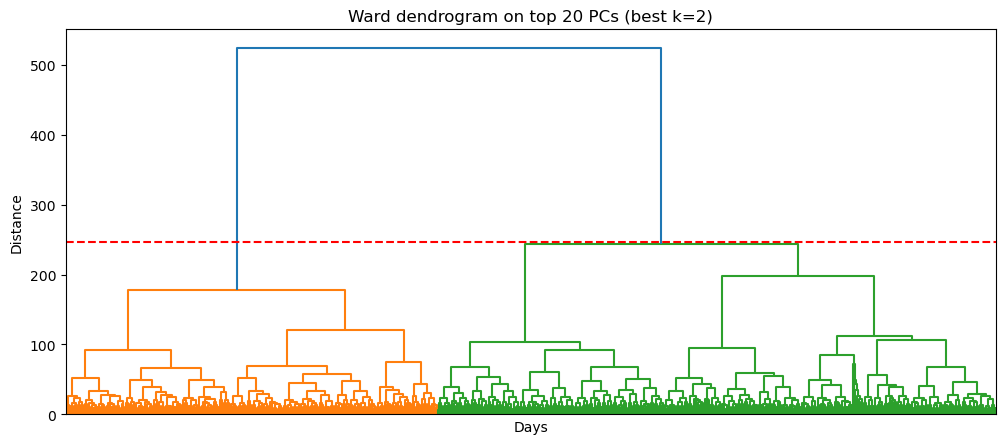

In [85]:
plt.figure(figsize=(12,5))
dendrogram(Z_pcs, no_labels=True, color_threshold=best_cut)
plt.axhline(best_cut, ls='--', c='red')
plt.title(f'Ward dendrogram on top {K} PCs (best k={best_k})')
plt.ylabel('Distance'); plt.xlabel('Days')
plt.show()

### 02.02 Fit PCA: per station on available features (maximum 11)

#### The following defined custom function will calculate station-specific PCA-enabled reduced features before clustering

In [90]:
def station_columns(df, station):
    return [c for c in df.columns if c.startswith(station + '_')]

def station_pca_cluster(df_scaled, station, var_threshold=0.80, k_grid=(2,3,4)):
    cols = station_columns(df_scaled, station)
    X = df_scaled[cols]
    pca_model, pca = fit_pca(X, n_components=None, use_scaler=False)
    cumexp = np.cumsum(pca.explained_variance_ratio_)
    K = int(np.argmax(cumexp >= var_threshold) + 1)
    scores = pca_model.transform(X)[:, :K]
    Z = linkage(scores, method='ward', metric='euclidean')

    best_k, best_sil, best_cut = None, -1, None
    for k in k_grid:
        heights = Z[:,2]
        for t in np.linspace(heights.min(), heights.max(), 200):
            labels = fcluster(Z, t=t, criterion='distance')
            if len(np.unique(labels)) == k:
                s = silhouette_score(scores, labels, metric='euclidean')
                if s > best_sil:
                    best_sil, best_k, best_cut = s, k, t
                break
    labels = fcluster(Z, t=best_cut, criterion='distance')
    return {'scores': scores, 'Z': Z, 'labels': labels,
            'best_k': best_k, 'best_cut': best_cut, 'sil': best_sil,
            'K': K, 'pca': pca, 'cols': cols}

2 0.29911682176666277 4


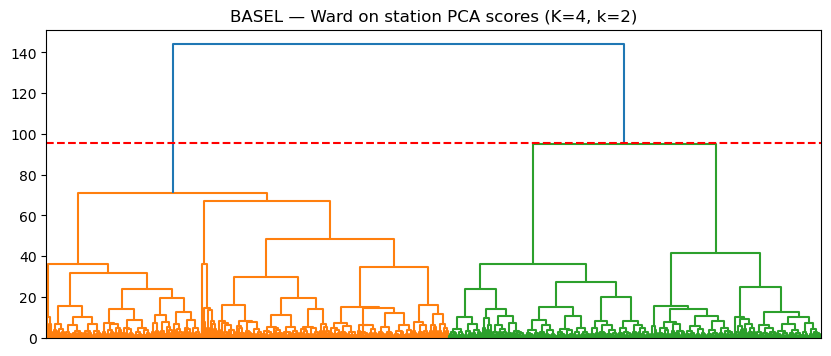

In [92]:
# Example: station PCA + cluster for BASEL, then Pleasant by cluster
res_basel = station_pca_cluster(df_scaled, 'BASEL', var_threshold=0.80, k_grid=(2,3,4))
print(res_basel['best_k'], res_basel['sil'], res_basel['K'])
plt.figure(figsize=(10,4))
dendrogram(res_basel['Z'], no_labels=True, color_threshold=res_basel['best_cut'])
plt.axhline(res_basel['best_cut'], ls='--', c='red')
plt.title(f"BASEL — Ward on station PCA scores (K={res_basel['K']}, k={res_basel['best_k']})")
plt.show()

In [94]:
# Pleasant alignment for the station:
base_col = 'BASEL_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_basel['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1897,0.017923
2,1755,0.498006


2 0.40416404605707906 3


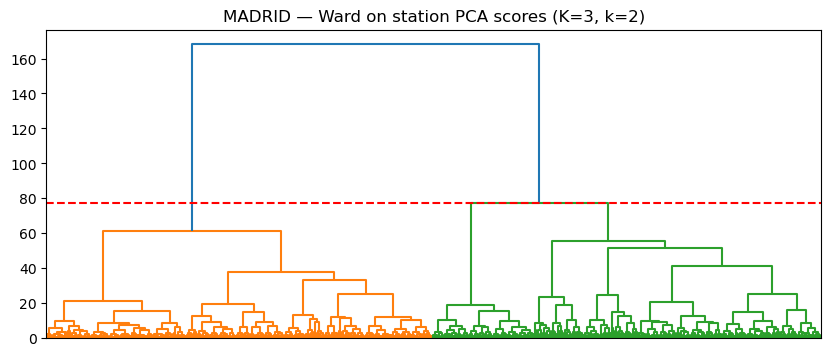

In [96]:
# Example: station PCA + cluster for MADRID, then Pleasant by cluster
res_madrid = station_pca_cluster(df_scaled, 'MADRID', var_threshold=0.80, k_grid=(2,3,4))
print(res_madrid['best_k'], res_madrid['sil'], res_madrid['K'])
plt.figure(figsize=(10,4))
dendrogram(res_madrid['Z'], no_labels=True, color_threshold=res_madrid['best_cut'])
plt.axhline(res_madrid['best_cut'], ls='--', c='red')
plt.title(f"MADRID — Ward on station PCA scores (K={res_madrid['K']}, k={res_madrid['best_k']})")
plt.show()

In [98]:
# Pleasant alignment for the station:
base_col = 'MADRID_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_madrid['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1821,0.854476
2,1831,0.068269


2 0.3332389030406613 3


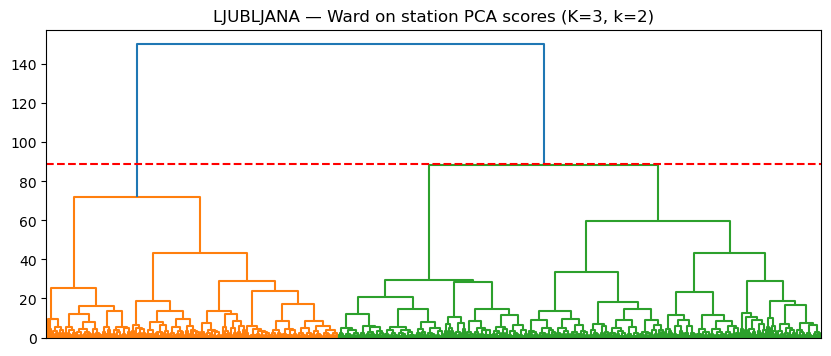

In [100]:
# Example: station PCA + cluster for LJUBLJANA, then Pleasant by cluster
res_ljubljana = station_pca_cluster(df_scaled, 'LJUBLJANA', var_threshold=0.80, k_grid=(2,3,4))
print(res_ljubljana['best_k'], res_ljubljana['sil'], res_ljubljana['K'])
plt.figure(figsize=(10,4))
dendrogram(res_ljubljana['Z'], no_labels=True, color_threshold=res_ljubljana['best_cut'])
plt.axhline(res_ljubljana['best_cut'], ls='--', c='red')
plt.title(f"LJUBLJANA — Ward on station PCA scores (K={res_ljubljana['K']}, k={res_ljubljana['best_k']})")
plt.show()

In [102]:
# Pleasant alignment for the station:
base_col = 'LJUBLJANA_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_ljubljana['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1378,0.000000
2,2274,0.471856


2 0.40095350633869153 3


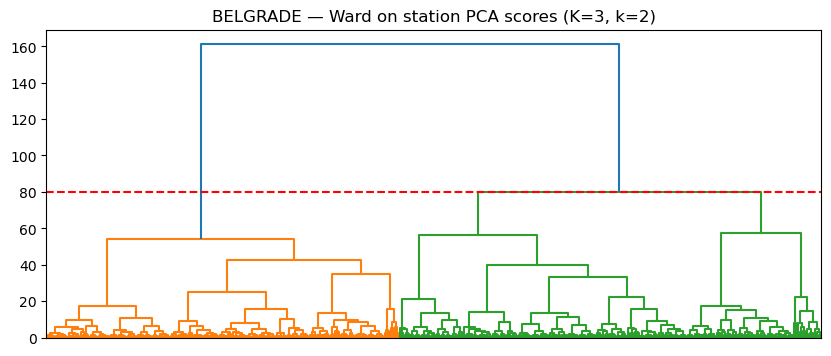

In [104]:
# Example: station PCA + cluster for BELGRADE, then Pleasant by cluster
res_belgrade = station_pca_cluster(df_scaled, 'BELGRADE', var_threshold=0.80, k_grid=(2,3,4))
print(res_belgrade['best_k'], res_belgrade['sil'], res_belgrade['K'])
plt.figure(figsize=(10,4))
dendrogram(res_belgrade['Z'], no_labels=True, color_threshold=res_belgrade['best_cut'])
plt.axhline(res_belgrade['best_cut'], ls='--', c='red')
plt.title(f"BELGRADE — Ward on station PCA scores (K={res_belgrade['K']}, k={res_belgrade['best_k']})")
plt.show()

In [106]:
# Pleasant alignment for the station:
base_col = 'BELGRADE_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_belgrade['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1664,0.719952
2,1988,0.051811


2 0.36899561747819964 3


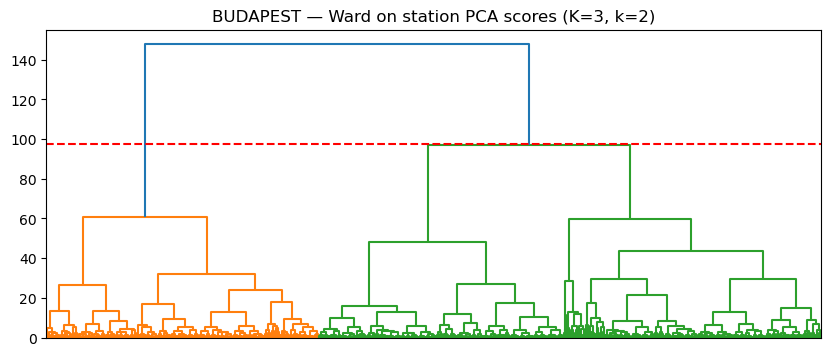

In [108]:
# Example: station PCA + cluster for BUDAPEST, then Pleasant by cluster
res_budapest = station_pca_cluster(df_scaled, 'BUDAPEST', var_threshold=0.80, k_grid=(2,3,4))
print(res_budapest['best_k'], res_budapest['sil'], res_budapest['K'])
plt.figure(figsize=(10,4))
dendrogram(res_budapest['Z'], no_labels=True, color_threshold=res_budapest['best_cut'])
plt.axhline(res_budapest['best_cut'], ls='--', c='red')
plt.title(f"BUDAPEST — Ward on station PCA scores (K={res_budapest['K']}, k={res_budapest['best_k']})")
plt.show()

In [110]:
# Pleasant alignment for the station:
base_col = 'BUDAPEST_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_budapest['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1285,0.000000
2,2367,0.542036


2 0.36687441076404126 3


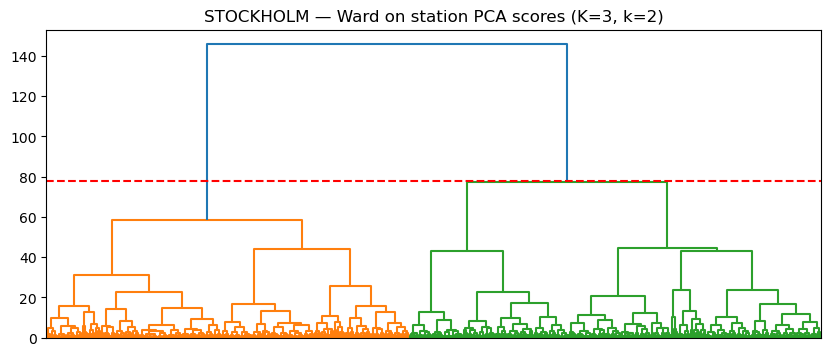

In [112]:
# Example: station PCA + cluster for STOCKHOLM, then Pleasant by cluster
res_stockholm = station_pca_cluster(df_scaled, 'STOCKHOLM', var_threshold=0.80, k_grid=(2,3,4))
print(res_stockholm['best_k'], res_stockholm['sil'], res_stockholm['K'])
plt.figure(figsize=(10,4))
dendrogram(res_stockholm['Z'], no_labels=True, color_threshold=res_stockholm['best_cut'])
plt.axhline(res_stockholm['best_cut'], ls='--', c='red')
plt.title(f"STOCKHOLM — Ward on station PCA scores (K={res_stockholm['K']}, k={res_stockholm['best_k']})")
plt.show()

In [114]:
# Pleasant alignment for the station:
base_col = 'STOCKHOLM_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_stockholm['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1714,0.000000
2,1938,0.349329


2 0.250581520550383 5


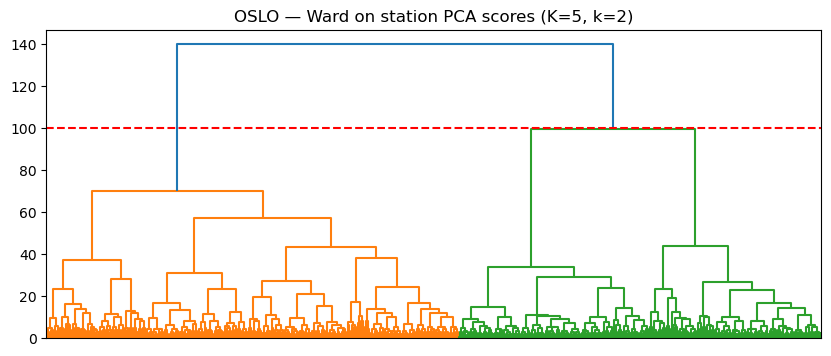

In [116]:
# Example: station PCA + cluster for OSLO, then Pleasant by cluster
res_oslo = station_pca_cluster(df_scaled, 'OSLO', var_threshold=0.80, k_grid=(2,3,4))
print(res_oslo['best_k'], res_oslo['sil'], res_oslo['K'])
plt.figure(figsize=(10,4))
dendrogram(res_oslo['Z'], no_labels=True, color_threshold=res_oslo['best_cut'])
plt.axhline(res_oslo['best_cut'], ls='--', c='red')
plt.title(f"OSLO — Ward on station PCA scores (K={res_oslo['K']}, k={res_oslo['best_k']})")
plt.show()

In [118]:
# Pleasant alignment for the station:
base_col = 'OSLO_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_oslo['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1946,0.006166
2,1706,0.343494


2 0.34460517779849553 3


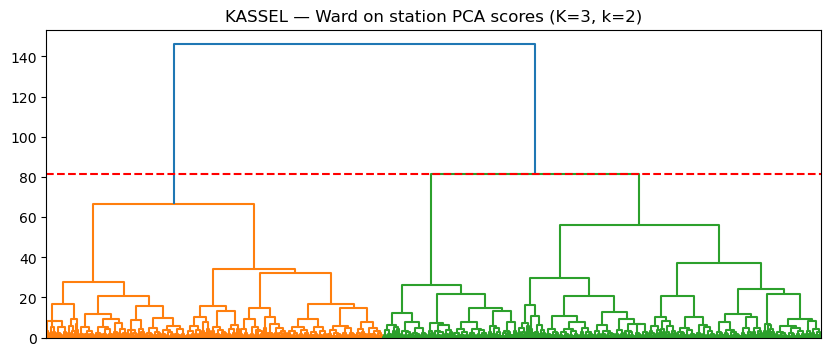

In [120]:
# Example: station PCA + cluster for KASSEL, then Pleasant by cluster
res_kassel = station_pca_cluster(df_scaled, 'KASSEL', var_threshold=0.80, k_grid=(2,3,4))
print(res_kassel['best_k'], res_kassel['sil'], res_kassel['K'])
plt.figure(figsize=(10,4))
dendrogram(res_kassel['Z'], no_labels=True, color_threshold=res_kassel['best_cut'])
plt.axhline(res_kassel['best_cut'], ls='--', c='red')
plt.title(f"KASSEL — Ward on station PCA scores (K={res_kassel['K']}, k={res_kassel['best_k']})")
plt.show()

In [122]:
# Pleasant alignment for the station:
base_col = 'KASSEL_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_kassel['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1588,0.000000
2,2064,0.346899


2 0.25478555431577216 5


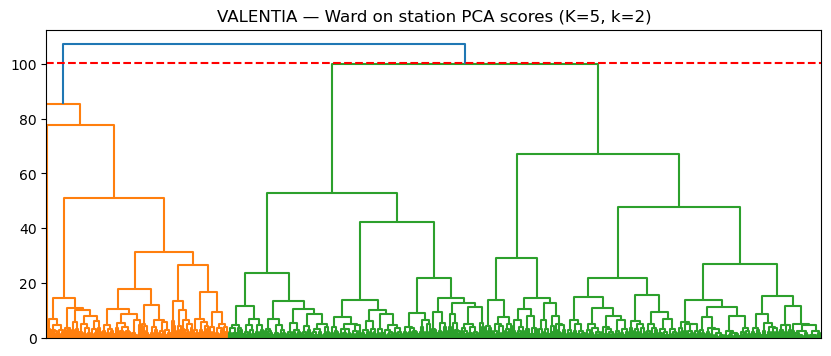

In [124]:
# Example: station PCA + cluster for VALENTIA, then Pleasant by cluster
res_valentia = station_pca_cluster(df_scaled, 'VALENTIA', var_threshold=0.80, k_grid=(2,3,4))
print(res_valentia['best_k'], res_valentia['sil'], res_valentia['K'])
plt.figure(figsize=(10,4))
dendrogram(res_valentia['Z'], no_labels=True, color_threshold=res_valentia['best_cut'])
plt.axhline(res_valentia['best_cut'], ls='--', c='red')
plt.title(f"VALENTIA — Ward on station PCA scores (K={res_valentia['K']}, k={res_valentia['best_k']})")
plt.show()

In [126]:
# Pleasant alignment for the station:
base_col = 'VALENTIA_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_valentia['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,860,0.000000
2,2792,0.063395


2 0.31162613717528403 3


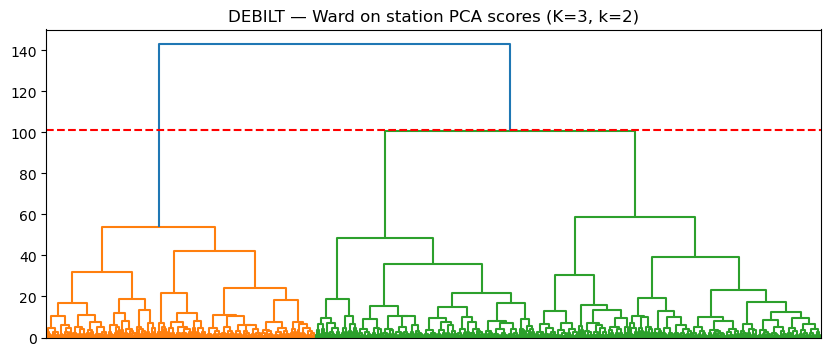

In [128]:
# Example: station PCA + cluster for DEBILT, then Pleasant by cluster
res_debilt = station_pca_cluster(df_scaled, 'DEBILT', var_threshold=0.80, k_grid=(2,3,4))
print(res_debilt['best_k'], res_debilt['sil'], res_debilt['K'])
plt.figure(figsize=(10,4))
dendrogram(res_debilt['Z'], no_labels=True, color_threshold=res_debilt['best_cut'])
plt.axhline(res_debilt['best_cut'], ls='--', c='red')
plt.title(f"DEBILT — Ward on station PCA scores (K={res_debilt['K']}, k={res_debilt['best_k']})")
plt.show()

In [130]:
# Pleasant alignment for the station:
base_col = 'DEBILT_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_debilt['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1269,0.546099
2,2383,0.037768


2 0.29253504107833733 4


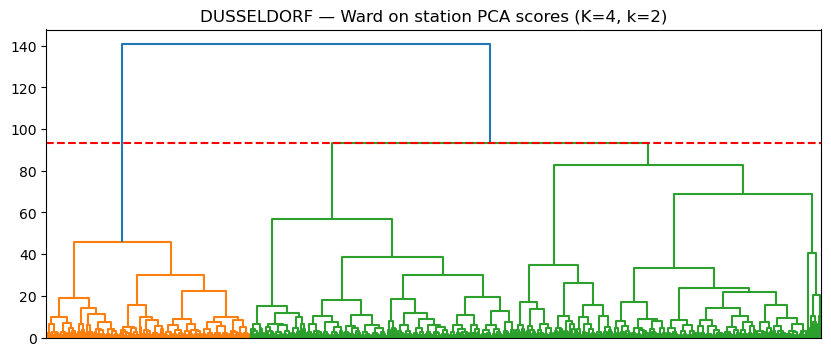

In [132]:
# Example: station PCA + cluster for DUSSELDORF, then Pleasant by cluster
res_dusseldorf = station_pca_cluster(df_scaled, 'DUSSELDORF', var_threshold=0.80, k_grid=(2,3,4))
print(res_dusseldorf['best_k'], res_dusseldorf['sil'], res_dusseldorf['K'])
plt.figure(figsize=(10,4))
dendrogram(res_dusseldorf['Z'], no_labels=True, color_threshold=res_dusseldorf['best_cut'])
plt.axhline(res_dusseldorf['best_cut'], ls='--', c='red')
plt.title(f"DUSSELDORF — Ward on station PCA scores (K={res_dusseldorf['K']}, k={res_dusseldorf['best_k']})")
plt.show()

In [134]:
# Pleasant alignment for the station:
base_col = 'DUSSELDORF_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_dusseldorf['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,962,0.656965
2,2690,0.064312


2 0.4083708521561922 3


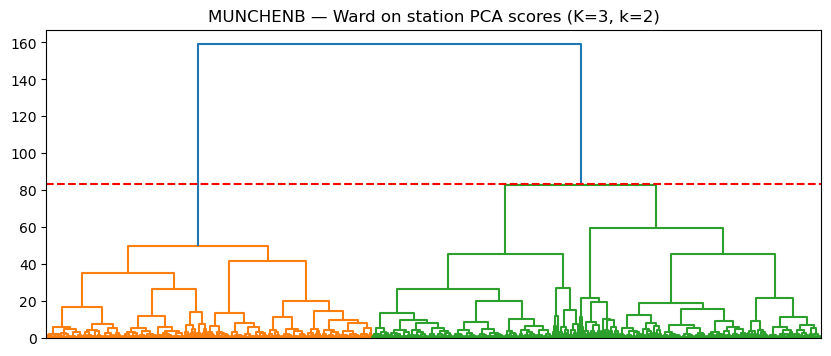

In [136]:
# Example: station PCA + cluster for MUNCHENB, then Pleasant by cluster
res_munchenb = station_pca_cluster(df_scaled, 'MUNCHENB', var_threshold=0.80, k_grid=(2,3,4))
print(res_munchenb['best_k'], res_munchenb['sil'], res_munchenb['K'])
plt.figure(figsize=(10,4))
dendrogram(res_munchenb['Z'], no_labels=True, color_threshold=res_munchenb['best_cut'])
plt.axhline(res_munchenb['best_cut'], ls='--', c='red')
plt.title(f"MUNCHENB — Ward on station PCA scores (K={res_munchenb['K']}, k={res_munchenb['best_k']})")
plt.show()

In [138]:
# Pleasant alignment for the station:
base_col = 'MUNCHENB_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_munchenb['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,1536,0.518880
2,2116,0.011815


2 0.3283167229392786 3


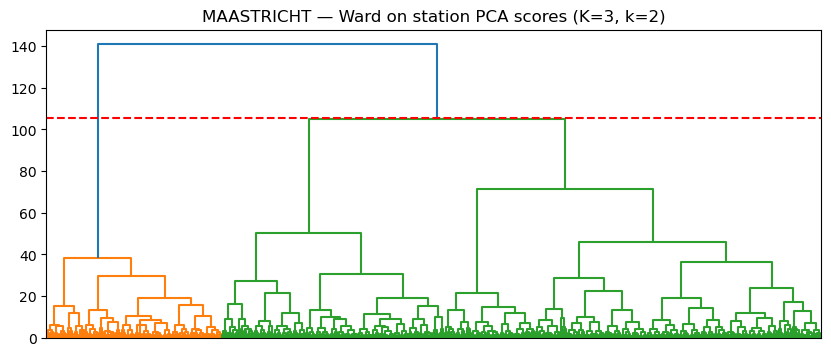

In [140]:
# Example: station PCA + cluster for MAASTRICHT, then Pleasant by cluster
res_maastricht = station_pca_cluster(df_scaled, 'MAASTRICHT', var_threshold=0.80, k_grid=(2,3,4))
print(res_maastricht['best_k'], res_maastricht['sil'], res_maastricht['K'])
plt.figure(figsize=(10,4))
dendrogram(res_maastricht['Z'], no_labels=True, color_threshold=res_maastricht['best_cut'])
plt.axhline(res_maastricht['best_cut'], ls='--', c='red')
plt.title(f"MAASTRICHT — Ward on station PCA scores (K={res_maastricht['K']}, k={res_maastricht['best_k']})")
plt.show()

In [142]:
# Pleasant alignment for the station:
base_col = 'MAASTRICHT_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_maastricht['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,828,0.729469
2,2824,0.074363


2 0.312877372259495 4


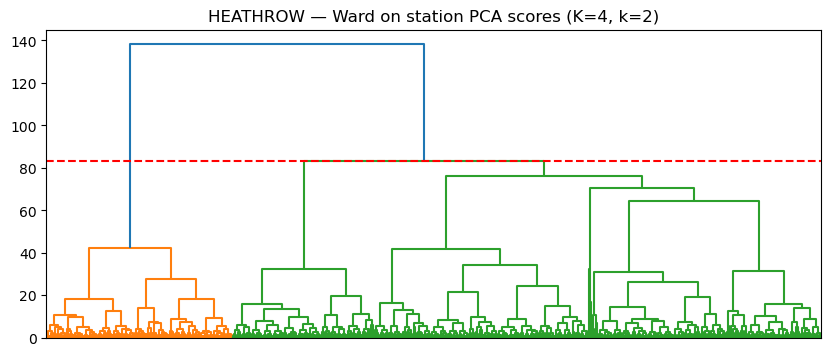

In [144]:
# Example: station PCA + cluster for HEATHROW, then Pleasant by cluster
res_heathrow = station_pca_cluster(df_scaled, 'HEATHROW', var_threshold=0.80, k_grid=(2,3,4))
print(res_heathrow['best_k'], res_heathrow['sil'], res_heathrow['K'])
plt.figure(figsize=(10,4))
dendrogram(res_heathrow['Z'], no_labels=True, color_threshold=res_heathrow['best_cut'])
plt.axhline(res_heathrow['best_cut'], ls='--', c='red')
plt.title(f"HEATHROW — Ward on station PCA scores (K={res_heathrow['K']}, k={res_heathrow['best_k']})")
plt.show()

In [146]:
# Pleasant alignment for the station:
base_col = 'HEATHROW_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_heathrow['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,878,0.694761
2,2774,0.076424


2 0.2635421008910348 4


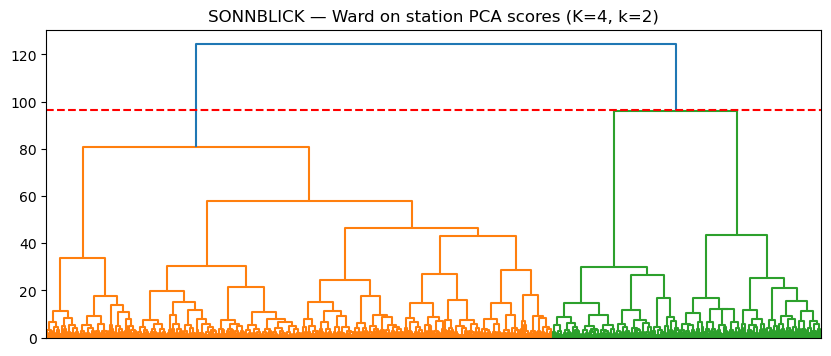

In [148]:
# Example: station PCA + cluster for SONNBLICK, then Pleasant by cluster
res_sonnblick = station_pca_cluster(df_scaled, 'SONNBLICK', var_threshold=0.80, k_grid=(2,3,4))
print(res_sonnblick['best_k'], res_sonnblick['sil'], res_sonnblick['K'])
plt.figure(figsize=(10,4))
dendrogram(res_sonnblick['Z'], no_labels=True, color_threshold=res_sonnblick['best_cut'])
plt.axhline(res_sonnblick['best_cut'], ls='--', c='red')
plt.title(f"SONNBLICK — Ward on station PCA scores (K={res_sonnblick['K']}, k={res_sonnblick['best_k']})")
plt.show()

In [150]:
# Pleasant alignment for the station:
base_col = 'SONNBLICK_pleasant_weather'
tmp = pd.DataFrame({
    'Cluster': res_sonnblick['labels'],
    'Pleasant': pleasant_ans_2001_2010[base_col].astype(int).values
})
display(tmp.groupby('Cluster').agg(N_obs=('Pleasant','size'),
                                   Pleasant_1_pct=('Pleasant','mean')))

,N_obs,Pleasant_1_pct
Cluster,,
1,2388,0.0
2,1264,0.0


### 03. Final question: cluster interpretation

#### Use some of the defined custom functions from the "Task 2.1 Part 1 dendrograms" script to re-create data for bar plots that may shed light on cluster interpretation.

In [171]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_station_dendrograms_with_summary(
    df_scaled: pd.DataFrame,
    stations: list[str],
    method: str = "ward",
    candidate_ks: tuple = (2,3,4),
    n_cols: int = 5,
    figscale: float = 4.0,
):
    """
    For each station:
      - hierarchical clustering on rows (days)
      - choose k from candidate_ks with best silhouette
      - cut tree at that height, extract labels
      - plot dendrogram with cut line
      - return (summary_df, labels_dict, counts_df)
    """
    results = []
    labels_dict = {}
    counts_dict = {}

    n_stations = len(stations)
    n_rows = int(np.ceil(n_stations / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figscale*n_cols, figscale*n_rows))
    axes = np.atleast_1d(axes).ravel()

    for i, st in enumerate(stations):
        ax = axes[i]
        cols = [c for c in df_scaled.columns if c.startswith(st)]
        if len(cols) == 0:
            ax.axis("off")
            ax.set_title(f"{st}\n(no columns)", fontsize=10)
            continue

        X = df_scaled[cols].values
        Z = linkage(X, method=method, metric="euclidean")

        # pick k by silhouette
        best_k, best_sil, best_cut = None, -np.inf, None
        for k in candidate_ks:
            cut = _find_cut_for_k(Z, k)
            labels_try = fcluster(Z, t=cut, criterion="distance")
            if len(np.unique(labels_try)) < 2:
                continue
            # Silhouette needs at least 2 clusters
            try:
                sil = silhouette_score(X, labels_try)
            except Exception:
                sil = -np.inf
            if sil > best_sil:
                best_k, best_sil, best_cut = k, sil, cut

        # fallback if silhouette selection failed
        if best_k is None:
            best_k = candidate_ks[0]
            best_cut = _find_cut_for_k(Z, best_k)
            labels = fcluster(Z, t=best_cut, criterion="distance")
        else:
            labels = fcluster(Z, t=best_cut, criterion="distance")

        labels_dict[st] = labels
        counts = pd.Series(labels).value_counts().sort_index()
        counts_dict[st] = counts.to_dict()

        results.append({
            "Station": st,
            "Method": method,
            "Chosen_k": int(best_k),
            "Cut_height": float(np.round(best_cut, 2)),
            "Silhouette": None if not np.isfinite(best_sil) else float(np.round(best_sil, 3))
        })

        # plot dendrogram
        dendrogram(Z, no_labels=True, ax=ax, color_threshold=best_cut)
        ax.axhline(best_cut, ls="--", c="red", lw=1.4)
        ax.set_title(f"{st} — {method}\n{best_k} clusters, Cut={best_cut:.1f}", fontsize=10)
        ax.set_xlabel("Days")
        ax.set_ylabel("Distance")

    # remove unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    summary_df = pd.DataFrame(results).set_index("Station")
    counts_df = pd.DataFrame(counts_dict).T.fillna(0).astype(int)
    counts_df.columns = [f"Cluster {c}" for c in counts_df.columns]

    return summary_df, labels_dict, counts_df

In [173]:
# --- helpers used by the plotting function ---

from scipy.cluster.hierarchy import fcluster
import numpy as np

def _station_cols(df, station_prefix: str):
    """All columns that belong to a given station (prefix_...)."""
    return [c for c in df.columns if c.startswith(station_prefix)]

def _find_cut_for_k(Z, k: int):
    """
    Given a SciPy linkage matrix Z and desired number of clusters k,
    return a distance threshold (cut height) that yields exactly k clusters.
    Strategy:
      - Merge heights are Z[:, 2]. If you cut between two consecutive merge heights,
        the number of clusters changes by 1.
      - We binary-search a height that produces the requested k via fcluster(..., criterion='distance').
    """
    heights = Z[:, 2]
    lo = 0.0
    hi = float(heights.max()) + 1e-6  # slightly above the last merge

    # quick guards:
    # cut at 0 -> N clusters (each point); cut at hi -> 1 cluster
    # we want something in between that yields k
    for _ in range(60):  # plenty for convergence
        mid = 0.5 * (lo + hi)
        labels = fcluster(Z, t=mid, criterion="distance")
        k_mid = len(np.unique(labels))
        if k_mid > k:
            # too many clusters => cut is too low -> raise the cut
            lo = mid
        elif k_mid < k:
            # too few clusters => cut too high -> lower the cut
            hi = mid
        else:
            return mid
    # If we didn’t hit exactly, return the best we can (closest side)
    return 0.5 * (lo + hi)

In [175]:
stations = [
    "BASEL","BELGRADE","BUDAPEST","DEBILT","DUSSELDORF",
    "HEATHROW","KASSEL","LJUBLJANA","MAASTRICHT","MADRID",
    "MUNCHENB","OSLO","SONNBLICK","STOCKHOLM","VALENTIA"
]

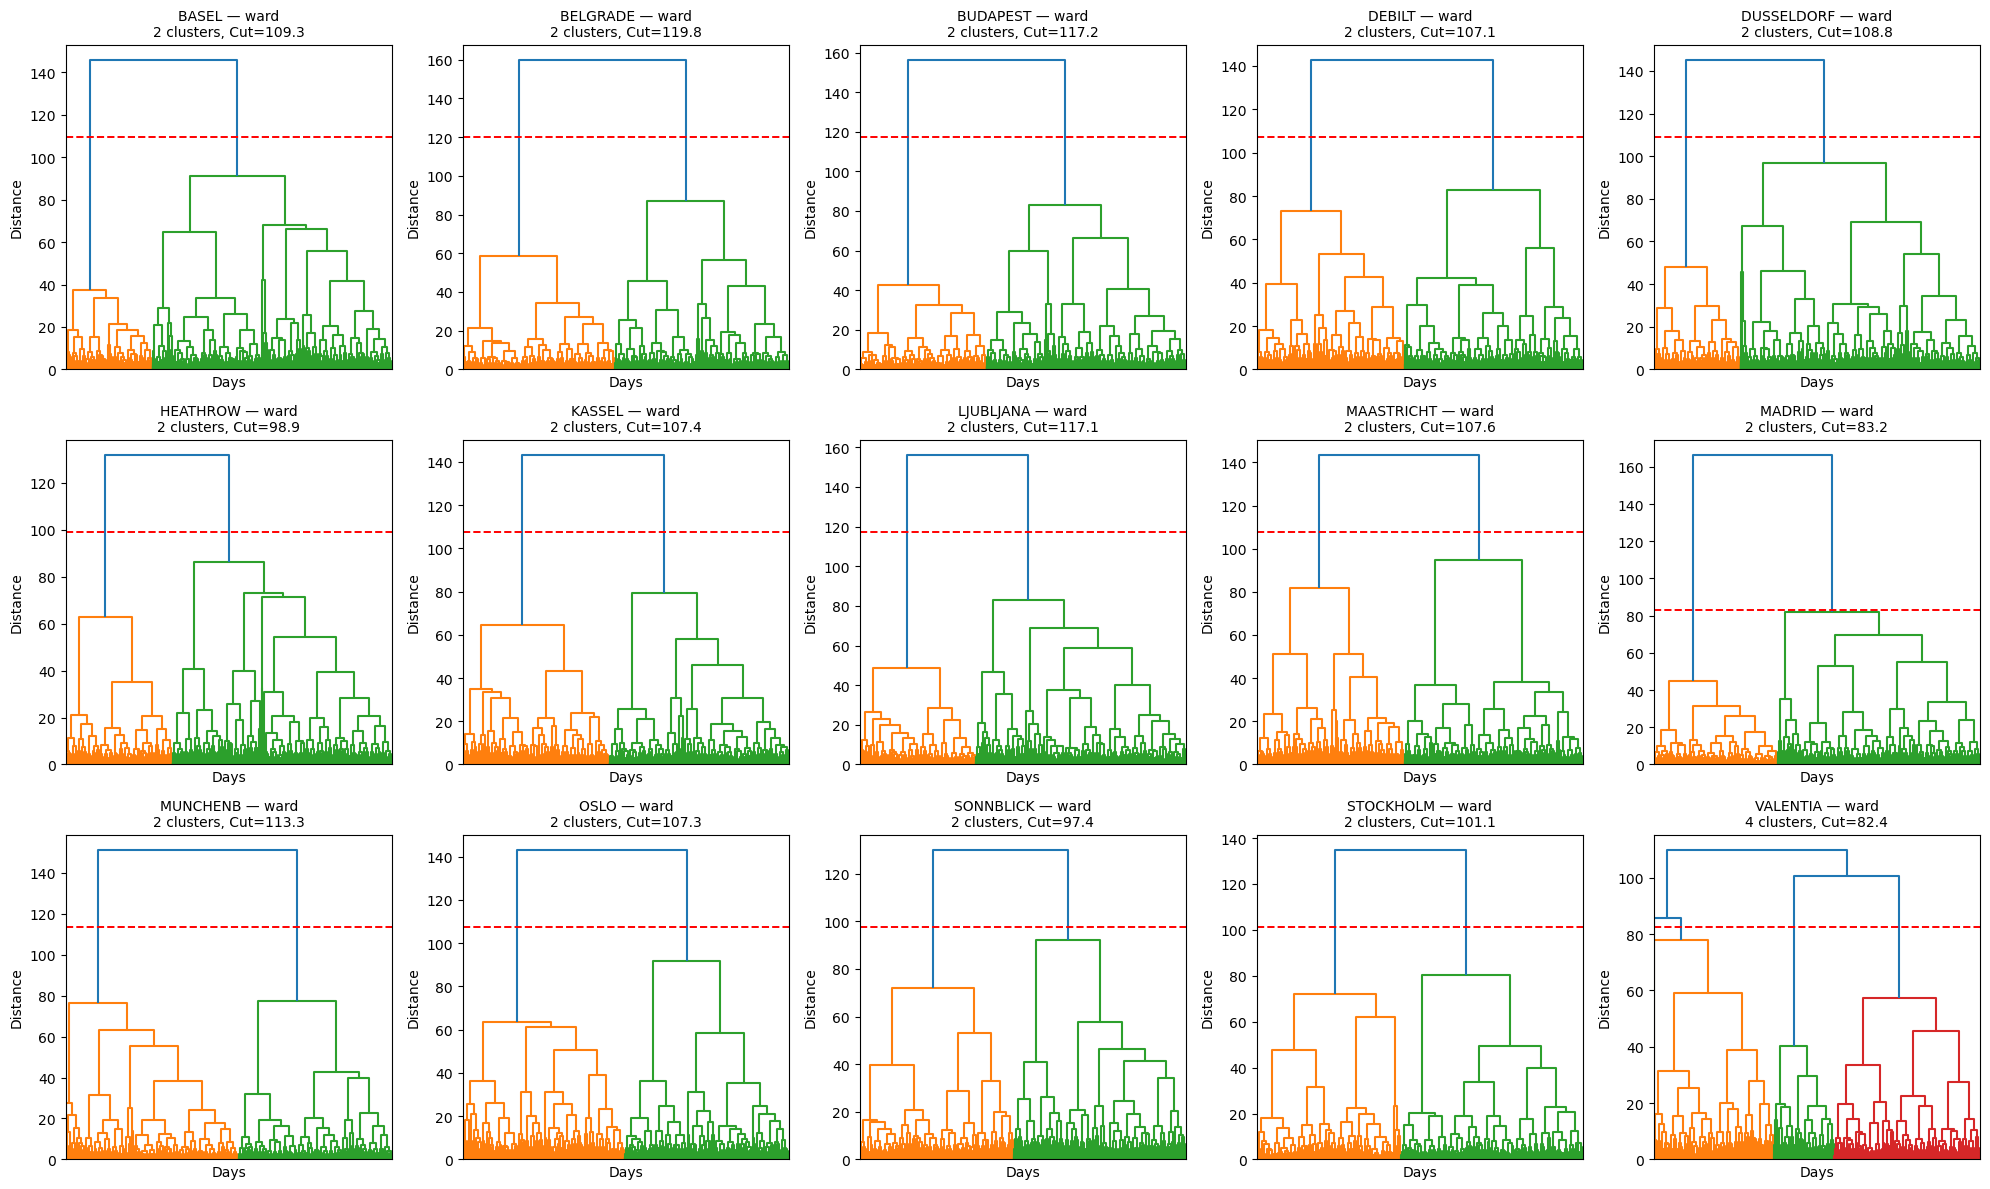

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,ward,2,109.31,0.261
BELGRADE,ward,2,119.84,0.332
BUDAPEST,ward,2,117.17,0.326
DEBILT,ward,2,107.05,0.250
DUSSELDORF,ward,2,108.83,0.262
HEATHROW,ward,2,98.95,0.224
KASSEL,ward,2,107.39,0.270
LJUBLJANA,ward,2,117.08,0.296
MAASTRICHT,ward,2,107.56,0.254


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BASEL,974,2678,0,0
BELGRADE,1706,1946,0,0
BUDAPEST,1421,2231,0,0
DEBILT,1659,1993,0,0
DUSSELDORF,973,2679,0,0
HEATHROW,1197,2455,0,0
KASSEL,1644,2008,0,0
LJUBLJANA,1301,2351,0,0
MAASTRICHT,1659,1993,0,0
MADRID,1392,2260,0,0


In [177]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_scaled, stations, method="ward", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

### Define a custom function to plot the monthly temporal distribution of clusters for a selected weather station (Basel, here), for the 2001-2010 decade. Reminder: we are using the 'ward' method-clustered z-score scaled weather data.

### Most of the Silhouette score-optimized cuts led to k=2 clusters for almost all stations (except Valentia, which had 4 clusters). For cluster interpretation purposes, we want to see whether (or how cleanly) clusters align with summer-like versus winter-like conditions, in general.

Cluster         1         2
Month                      
1        0.000000  1.000000
2        0.035461  0.964539
3        0.154839  0.845161
4        0.383333  0.616667
5        0.412903  0.587097
6        0.630000  0.370000
7        0.648387  0.351613
8        0.554839  0.445161
9        0.336667  0.663333
10       0.032258  0.967742
11       0.000000  1.000000
12       0.000000  1.000000


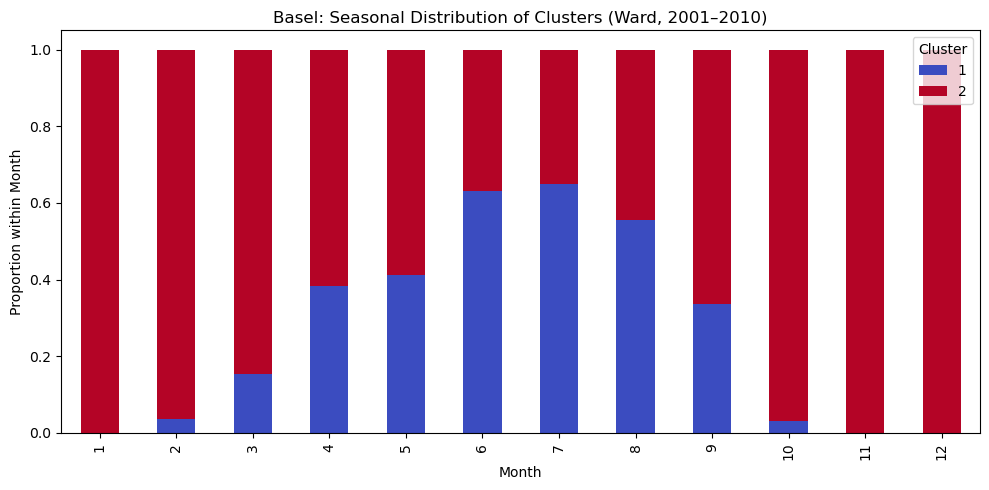

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Build synthetic date range (matches df_scaled rows)
dates = pd.date_range(start="2001-01-01", end="2010-12-31", freq="D")
assert len(dates) == 3652  # sanity check

# 2. Extract Basel cluster labels (from your ward run)
basel_clusters = pd.Series(labels["BASEL"], index=dates, name="Cluster")

# 3. Add month column
basel_df = basel_clusters.to_frame().reset_index()
basel_df.columns = ["Date", "Cluster"]
basel_df["Month"] = basel_df["Date"].dt.month

# 4. Crosstab: cluster vs month
ct = pd.crosstab(basel_df["Month"], basel_df["Cluster"], normalize="index")
print(ct)

# 5. Visualization
ct.plot(kind="bar", stacked=True, figsize=(10,5), colormap="coolwarm")
plt.title("Basel: Seasonal Distribution of Clusters (Ward, 2001–2010)")
plt.xlabel("Month")
plt.ylabel("Proportion within Month")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### Define a custom function to expand the scope by calculating a similar plot (as above) for all weather stations

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multi_station_seasonality(labels_dict, stations, start_year=2001, end_year=2010):
    """
    Creates a seasonal cluster distribution plot for each station.
    Each subplot shows proportion of clusters per month (like Basel example).
    
    labels_dict : dict[str, np.ndarray]
        Keys = station names, values = cluster label arrays (length = n_days)
    stations : list[str]
        Stations to plot (must be keys in labels_dict)
    """
    # Build a datetime index for 2001-01-01 → 2010-12-31 (including leap years)
    dates = pd.date_range(f"{start_year}-01-01", f"{end_year}-12-31", freq="D")
    assert len(dates) == len(next(iter(labels_dict.values()))), "Date length mismatch!"

    n_stations = len(stations)
    n_cols = 3
    n_rows = (n_stations + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows), sharey=True)
    axes = axes.flatten()

    for i, st in enumerate(stations):
        df = pd.DataFrame({
            "Date": dates,
            "Month": dates.month,
            "Cluster": labels_dict[st]
        })

        # Compute proportions per month
        props = (
            df.groupby(["Month", "Cluster"]).size().unstack(fill_value=0)
            .div(df.groupby("Month").size(), axis=0)
        )

        props.plot(
            kind="bar", stacked=True, ax=axes[i],
            color=["tab:blue", "tab:red", "tab:green", "tab:purple"]
        )

        axes[i].set_title(st, fontsize=11)
        axes[i].set_xlabel("Month")
        axes[i].set_ylabel("Proportion")

    # Clean up empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Seasonal Distribution of Clusters (Ward, 2001–2010)", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

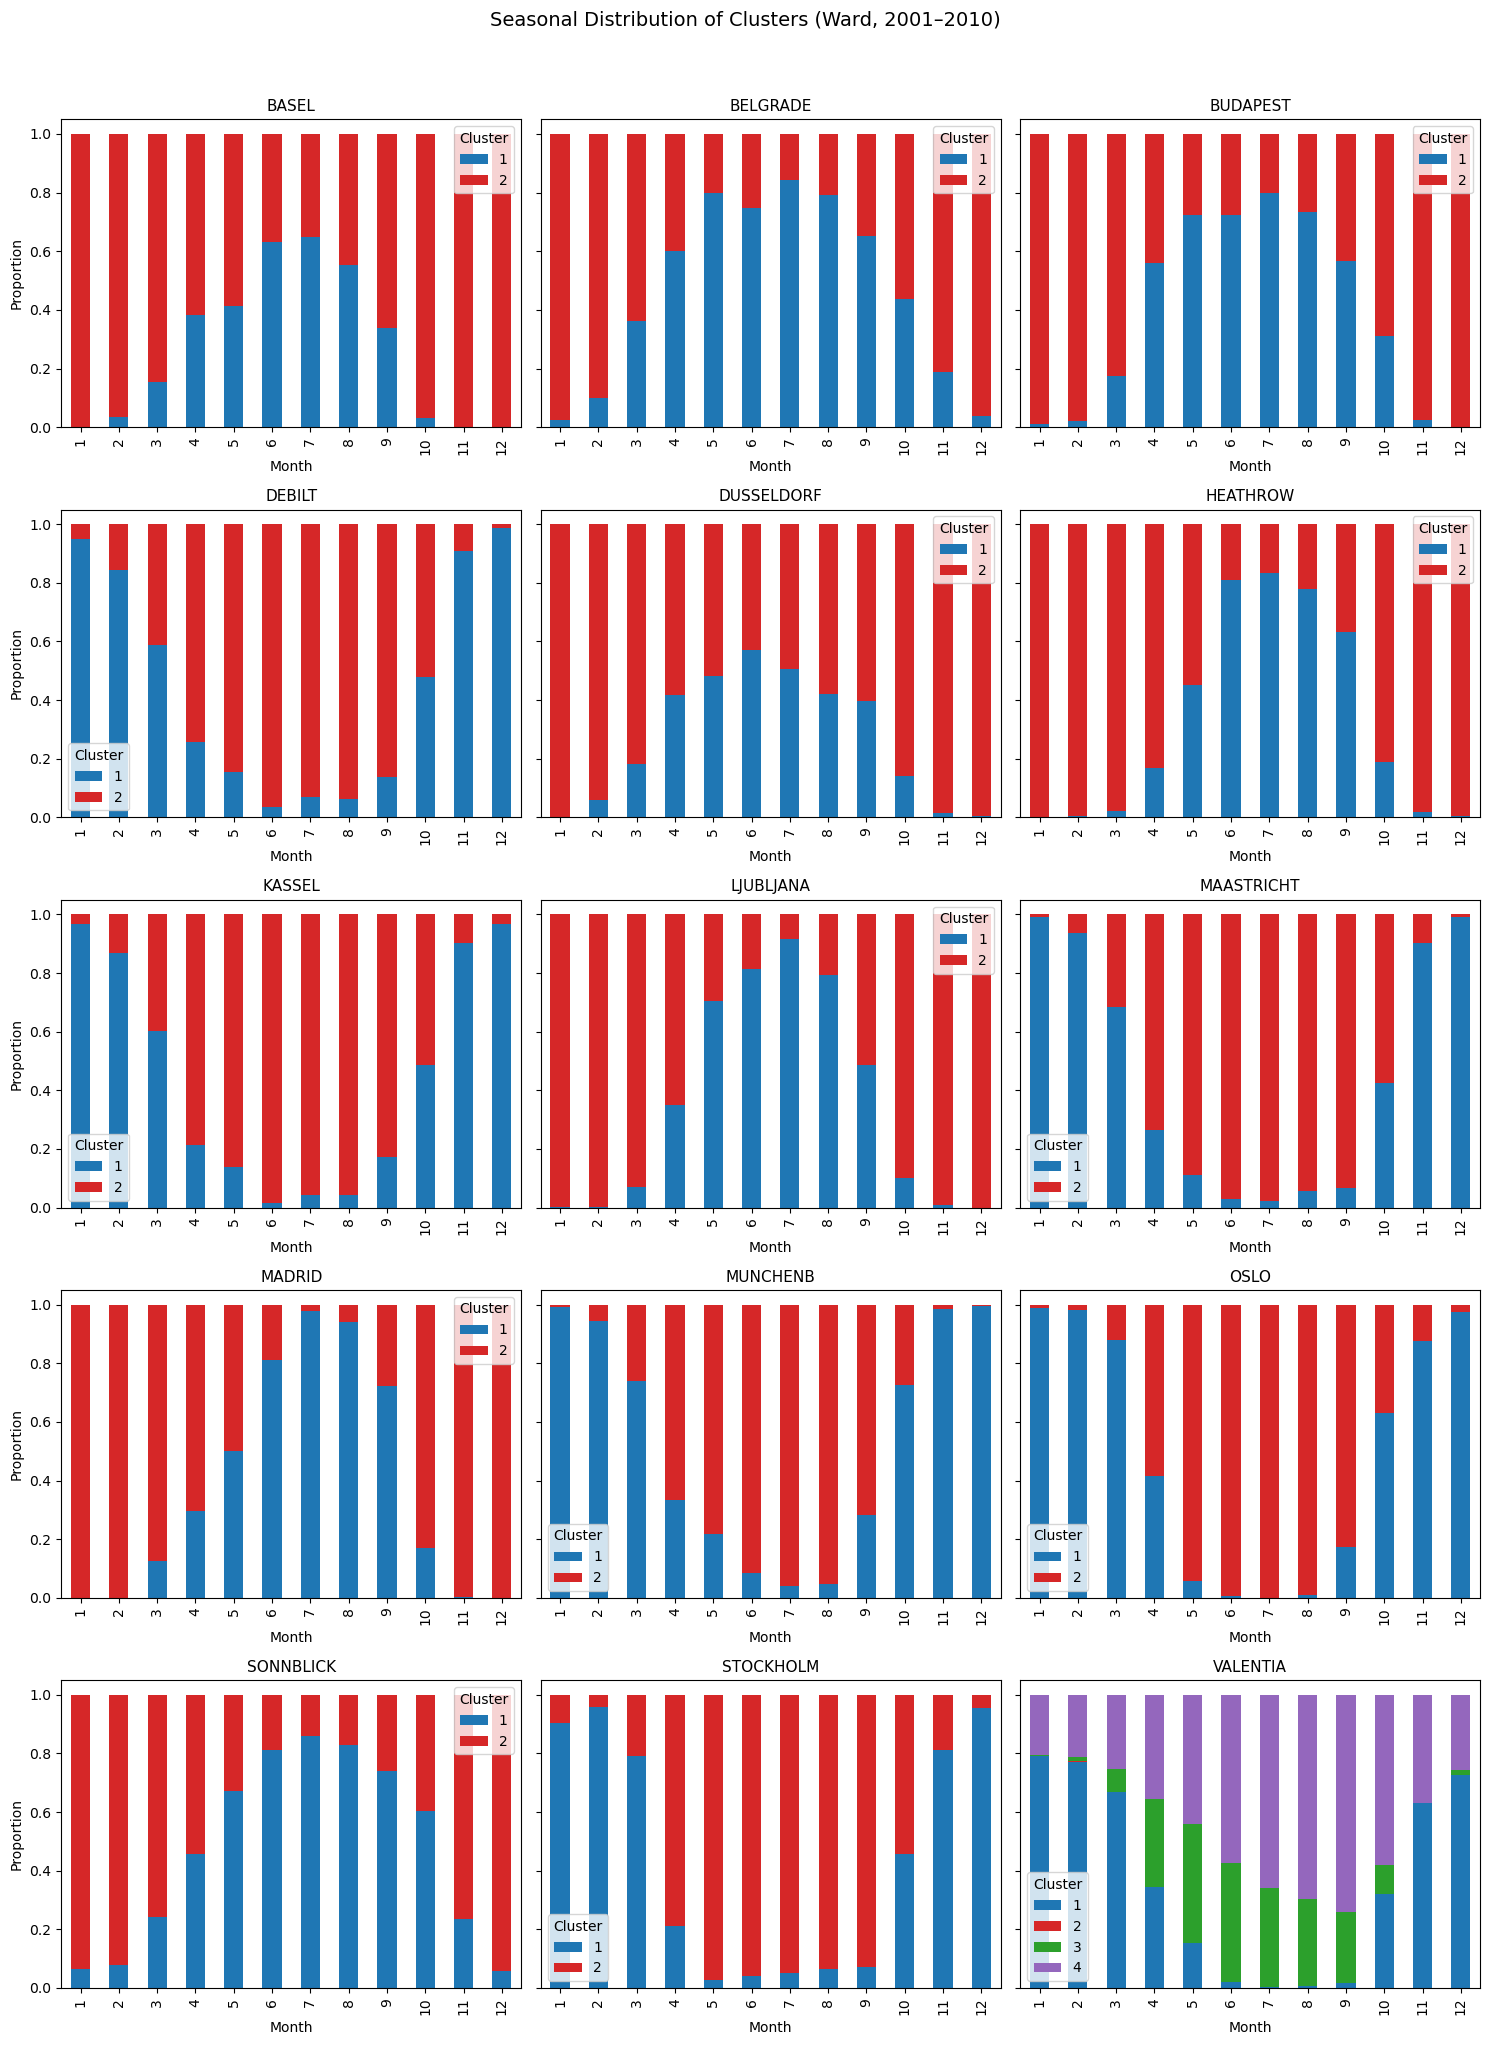

In [189]:
stations = list(labels.keys())   # or your ordered station list
plot_multi_station_seasonality(labels, stations)

### Interpretation: Clusters aligned with summer-like or winter-like weather "regimes", which are not binary in a yes/no sense, judging from their monthly temporal distribution proportions. On an annual, seasonal cycle. There can be days during summer that mimic other seasons (fall, winter), hence more than one cluster (color) appears within most months, or the same can happen during winter but perhaps to a lesser degree. Valentia is an outlier, with 4 clusters which are highly imbalanced (1: 1347 days, 2: 1 day; 3: 673 days; 4: 1631 days), highlighting its climate uniqueness. As a maritime site on Ireland's Atlantic coast, it faces the complicated interplay of oceanic air masses which can lead to abrupt weather change.  The weather station also had inaccurate (flatlining) temperature data series (all three: min, max, mean) within the final decade of the 1960-2022 larger weather dataset.